# Decaimiento Radiactivo

### Integrantes

#### Héctor Andrés Flores 
#### Alejandra Yuriko Yamamoto

## Introducción

#### Método de Monte Carlo

El método de Monte Carlo es una técnica numérica para calcular probabilidades utilizando secuencias de números aleatorios. La computadora genera números aleatorios, con el fin de simular procesos naturales aleatorios, como por ejemplo, el decaimiento radiactivo.

#### Decaimiento Radiactivo

Se quiere simular cómo decae un número pequeño N de partículas radiactivas. 
En particular, queremos mostrar que dicho decaimiento se comporta de manera exponencial y en ocasiones estocásticamente.


El decaimiento radiactivo es un proceso natural en el cual una partícula, sin interacción externa, decae a un estado estable. Aún cuando la probabilidad de decaimiento en un intervalo de tiempo es constante, justo cuando ésta decae es un evento aleatorio. De hecho, puesto que el momento exacto cuando una partícula decae es aleatorio, no importa qué tanto tiempo ha estado "viva" la partícula o si otras partícula ya han decaído. En otras palabras, la probabilidad de cualquier partícula que decae por intervalo unitario de tiempo es constante y una vez que decae, se pierde para siempre. Por supuesto, el número total de partículas disminuyen con el tiempo, así como el número de decaimientos, pero la probabilidad de cualquiera de estas partículas en decaer en un cierto intervalo de tiempo es siempre la misma constante, siempre y cuando dicha partícula exista.

#### Mean lifetime (Vida Media)

El promedio de vida de un núcleo o partícula subatómica libre antes de desintegrarse.



#### Half-life time (Periodo de Semidesintegración)

El periodo de semidesintegración $T_{1/2}$, es el tiempo necesario para que se desintegre la mitad de los núcleos de la muestra inicial.

### Decaimiento Discreto

Suponemos que tenemos una muestra de núcleos radiactivos $N(t)$ al tiempo $t$. Sea $\Delta N$ el número de partículas que decaen en un cierto intervalo de tiempo $\Delta t$.

Se escribe la ecuación donde la probabilidad p de cualquier partícula que decae en una unidad de tiempo es constante.

$$P = \frac{\Delta N(t)/N(t)}{\Delta t} = -\lambda$$

$$ \frac{\Delta N(t)}{\Delta t} = - \lambda N(t) $$

In [7]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
using Interact

**[1]** Resolver la ecuación diferencial de decaimiento radiactivo mediante algún método visto en clase:


$$ \frac{dN(t)}{dt} = - \lambda N(t) $$



In [12]:
?metodo_Euler

search:



La función 'metodo_Euler' con parámetros t0 (tiempo inicial), tf (tiempo final), f (función) y h (tamaño de paso),  aplica el método de Euler a una función f y devuelve el resultado en un primer arreglo (xs) y los tiempos en el segundo  arreglo (ts). Con estos datos se muestra la gráfica de decaimiento. 


Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.05, nactions=1),"h",0.05,"0.05",Interact.OptionDict(DataStructures.OrderedDict("0.001"=>0.001,"0.002"=>0.002,"0.003"=>0.003,"0.004"=>0.004,"0.005"=>0.005,"0.006"=>0.006,"0.007"=>0.007,"0.008"=>0.008,"0.009"=>0.009,"0.01"=>0.01…),Dict(0.053=>"0.053",0.055=>"0.055",0.026=>"0.026",0.09=>"0.09",0.063=>"0.063",0.045=>"0.045",0.041=>"0.041",0.011=>"0.011",0.047=>"0.047",0.001=>"0.001"…)),Any[],Any[],true,"horizontal")


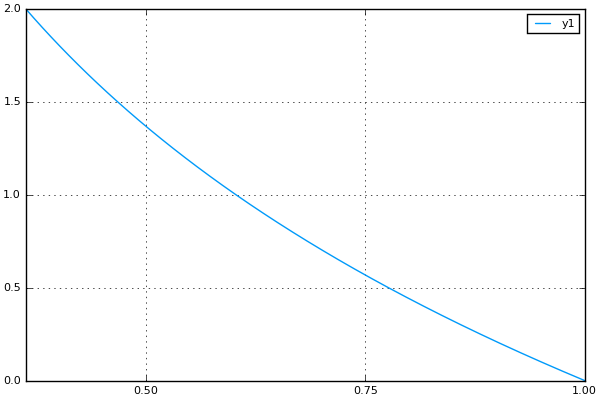

In [11]:
"""
La función 'metodo_Euler' con parámetros t0 (tiempo inicial), tf (tiempo final), f (función) y h (tamaño de paso), 
aplica el método de Euler a una función f y devuelve el resultado en un primer arreglo (xs) y los tiempos en el segundo 
arreglo (ts). Con estos datos se muestra la gráfica de decaimiento. 
"""

function metodo_Euler(t0, tf, f::Function, h = 0.1)
    
    ts = t0:h:tf
    xs = zeros(ts)
    xs[1] = 1
    
    for i in 2:length(xs)
        xs[i] = xs[i-1] + h*f(xs[i-1],ts[i-1]) 
    end
    
    return xs,ts
end

##############################################################
################################################
###############################
##############
########
##

@manipulate for  h in 0.001:0.001:0.1
    
    function decaimiento(x, t)
        return -λ*x
    end
    
    ti = 0
    tf = 2
    λ  = 0.5
    
    
    ts,xs = metodo_Euler(ti,tf,decaimiento, h)
  
    plot(ts, xs)
end


    

### Gráficas de decaimiento


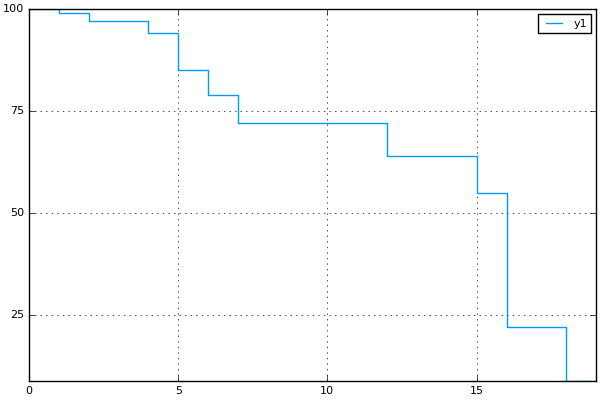

In [62]:
function decai_Monte(N)
    t = 0
    ΔN = 0
    N_decaida = [N]
    tiempo_decaida = [0]
    
    while N > 0
        
        
        λ = rand()
        
        if λ >= 0.5
            ΔN += 1
            N -= ΔN
            if N > 0
                push!(N_decaida,N)
                t = t
                push!(tiempo_decaida, t)
            end 
            
        end
        
         
        
        if λ < 0.5
            if N > 0
                push!(N_decaida,N)
                t = t + 1
                push!(tiempo_decaida,t)
                
            end 
            
        end

    end
    return tiempo_decaida, N_decaida
end

tiempo, nucleo = decai_Monte(100)
plot(tiempo, nucleo)

In [99]:
?Decay_MC

search:



La función Decay_MC tiene como parámetros, N (número inicial de núcleos), Δt (intervalo de tiempo)  y λ (constante de decaimiento). La probabilidad p se calcula mediante una relación de Δt y λ.  Esta función toma números aleatorios para calcular el decaimiento de los N núcleos y regresa  un arreglo de tiempos y otro con los núcleos restantes para cada tiempo.  El resultado omite el último valor, cuando se se tienen cero núcleos restantes.


In [32]:
"""
La función Decay_MC tiene como parámetros, N (número inicial de núcleos), Δt (intervalo de tiempo) 
y λ (constante de decaimiento).
La probabilidad p se calcula mediante una relación de Δt y λ. 
Esta función toma números aleatorios para calcular el decaimiento de los N núcleos y regresa 
un arreglo de tiempos y otro con los núcleos restantes para cada tiempo. 
El resultado omite el último valor, cuando se se tienen cero núcleos restantes.
"""

#Función de Decaimiento para N núcleos a probabilidad p

function Decay_MC(N, Δt, λ, dt) # N es el número inicial de núcleos, Δt el intervalo de tiempo, dt es 
                                # y λ la constante de decaimiento. 
                                 
    t0 = 0.0
    p = dt*λ   # Δt es el intervalo de tiempo con que avanza.
    t_decay = [t0] # Arreglo de tiempos
    N_decay = [N] # Arreglo de valores de N en el tiempo
    
    while N > 0
        
        for i in 1:N
            
            r = rand() # Genera un número aleatorio entre 0 y 1
        
            if r > p
                N = N
            else
                N -= 1
            end
        end
        
        t0 += Δt # pasa al siguiente tiempo

        push!(t_decay, t0)
        push!(N_decay, N)
                    
    end
    
    pop!(t_decay) # Quita el último tiempo
    pop!(N_decay) # Quita el último valor (cero) 

    return t_decay, N_decay
end

Decay_MC

In [5]:
# Uso de la función Decay_MC
t1, n1 = Decay_MC(1000, 0.01, 0.0001, 100)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  6.71,6.72,6.73,6.74,6.75,6.76,6.77,6.78,6.79,6.8],[1000,993,989,983,971,957,951,939,928,919  …  1,1,1,1,1,1,1,1,1,1])


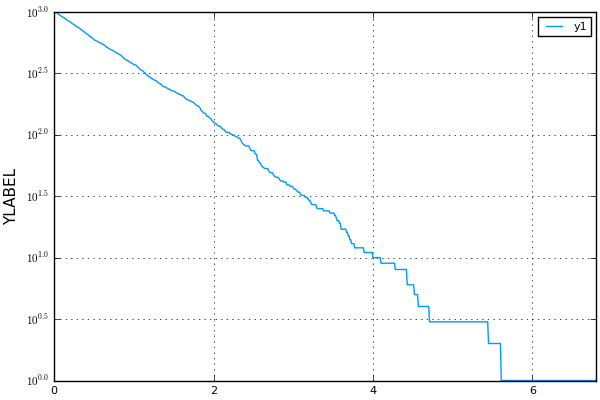

In [8]:
# Gráfica de t1 vs. log(n1) (1 iteración)
plot(t1, n1)
yaxis!("YLABEL",:log10)


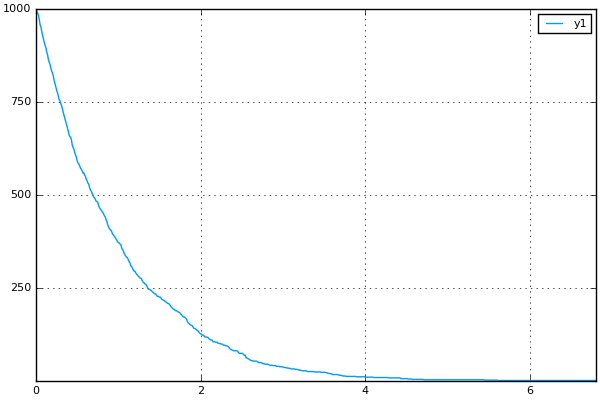

In [9]:
# Gráfica t1 vs. n1 (1 iteración)
plot(t1, n1)


Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(500, nactions=1),"i",500,"500",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(306=>"306",29=>"29",74=>"74",905=>"905",176=>"176",892=>"892",285=>"285",318=>"318",873=>"873",975=>"975"…)),Any[],Any[],true,"horizontal")


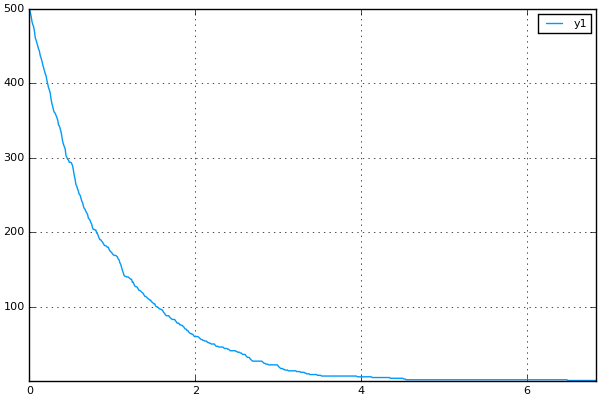

In [13]:
# Gráfica donde variamos los núcleos (1 iteración)
@manipulate for i in 1:1000
    tiempo, nucleos = Decay_MC(i, 0.01, 0.0001, 100)
    plot(tiempo,nucleos)
end

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(5000, nactions=1),"i",5000,"5000",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(9775=>"9775",2843=>"2843",4495=>"4495",6928=>"6928",9905=>"9905",6380=>"6380",1316=>"1316",6265=>"6265",5459=>"5459",5842=>"5842"…)),Any[],Any[],true,"horizontal")


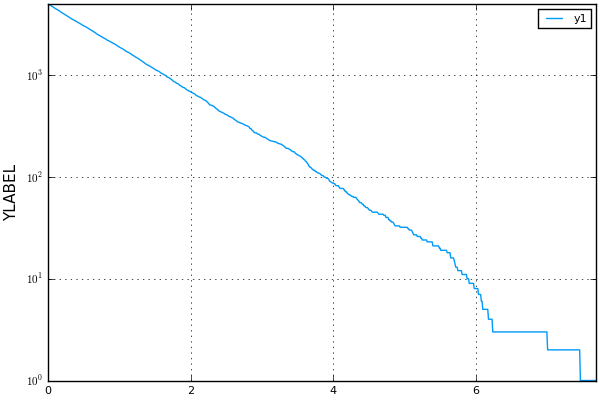

In [105]:
# Gráfica donde variamos los núcleos (1 iteración) en escala logarítmica
@manipulate for i in 1:10000
    tiempo, nucleos = Decay_MC(i, 0.01, 0.0001, 100)
    plot(tiempo,nucleos)
    yaxis!("YLABEL",:log10)
end

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(500, nactions=1),"i",500,"500",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(306=>"306",29=>"29",74=>"74",905=>"905",176=>"176",892=>"892",285=>"285",318=>"318",873=>"873",975=>"975"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.005, nactions=1),"j",0.005,"0.005",Interact.OptionDict(DataStructures.OrderedDict("0.0001"=>0.0001,"0.0002"=>0.0002,"0.0003"=>0.0003,"0.0004"=>0.0004,"0.0005"=>0.0005,"0.0006"=>0.0006,"0.0007"=>0.0007,"0.0008"=>0.0008,"0.0009"=>0.0009,"0.001"=>0.001…),Dict(0.0008=>"0.0008",0.0046=>"0.0046",0.0005=>"0.0005",0.0087=>"0.0087",0.0093=>"0.0093",0.0098=>"0.0098",0.0045=>"0.0045",0.0018=>"0.0018",0.0032=>"0.0032",0.0061=>"0.0061"…)),Any[],Any[],true,"horizontal")


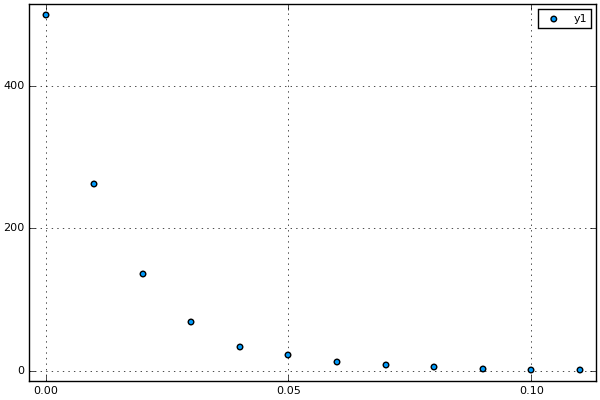

In [106]:
# Cambiamos p, probabilidades
@manipulate for i in 1:1000, j in 0.0001:0.0001:0.01
    tiempo1, nucleos1 = Decay_MC(i, 0.01, j, 100)
    scatter(tiempo1,nucleos1)
end

## Pendiente igual a $\lambda$

In [85]:
tiempos, nucleos = Decay_MC(100, 0.01, 0.0001, 100);
a = log(nucleos)    
t = tiempos;

M = (a[2] - a[1])/ (t[2] - t[1]


0.0

### Iteraciones

In [20]:
?iterarDecay

search:



La función iterarDecay acepta el número de núcleos iniciales, la probabilidad con que decaen  y el número de veces que se quiere iterar la función Decay_MC. Regresa una lista de listas de tiempos y núcleos restantes.


In [40]:
"""
La función iterarDecay acepta el número de núcleos iniciales, la probabilidad con que decaen 
y el número de veces que se quiere iterar la función Decay_MC.
Regresa una lista de listas de tiempos y núcleos restantes.
"""
function iterarDecay(N, Δt, λ, dt, n) # n es el número de veces que se itera
    
    arreglo_nucleo = [] # Lista que contiene n listas de núcleos 
    arreglo_tiempo = [] # Lista que contiene n listas de tiempos
    
    for i in 1:n
        decaimientos = Decay_MC(N, Δt, λ, dt)
        push!(arreglo_tiempo, decaimientos[1])
        push!(arreglo_nucleo, decaimientos[2])
        #@show i, decaimientos
    end
    return arreglo_tiempo, arreglo_nucleo
end

iterarDecay

In [41]:
?prom_Decay

search:



Función prom_Decay(N, p, n) donde N es el número de núcleos iniciales, p la probabilidad de decaimiento  y n el número de iteraciones. Llama a la función iterarDecay, obtiene la longitud máxima entre todas las iteraciones, después rellena con 1's los arreglos y nos regresa el promedio de las iteraciones.

Función prom_Decay(N, p, n) donde N es el número de núcleos iniciales, p la probabilidad de decaimiento  y n el número de iteraciones. Llama a la función iterarDecay, obtiene la longitud máxima entre todas las iteraciones, después rellena con 1's los arreglos y nos regresa el promedio de las iteraciones.


In [52]:
"""
Función prom_Decay(N, p, n) donde N es el número de núcleos iniciales, p la probabilidad de decaimiento 
y n el número de iteraciones. Llama a la función iterarDecay, obtiene la longitud máxima entre todas las
iteraciones, después rellena con 1's los arreglos y nos regresa el promedio de las iteraciones.
"""

function prom_Decay(N, Δt, λ, dt, n)
    
    iteracion = iterarDecay(N, Δt, λ, dt, n)
    max = 1
    iter_tiempos = iteracion[1]
    iter_nucleos = iteracion[2]
    
    for i in 1:n
        if length(iter_nucleos[i]) > max
            max = length(iter_nucleos[i])
        else
            max = max
        end
    end
    
    #@show max, iter_tiempos, iter_nucleos
    
    for i in 1:n
        while length(iter_nucleos[i]) <= max
            tiempos = iter_tiempos[i]
            ultimo_tiempo = tiempos[end]
            push!(iter_tiempos[i], ultimo_tiempo + Δt)
            push!(iter_nucleos[i], 1)
            #@show i, lista_tiempos, lista_nucleos
        end
    end
    #return iter_tiempos, iter_nucleos
    
    
    suma = iter_nucleos[1]
    promedios = 0.0

    for k in 1:length(iter_nucleos)-1
        suma += iter_nucleos[1+k]
        #@show k, suma
        promedios = suma/length(iter_nucleos)
    
    end
    return iter_tiempos[1], promedios
end

prom_Decay

In [53]:
# Ejemplo
pt1, pn1 = prom_Decay(1000, 0.01, 0.0001, 100, 500)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  12.32,12.33,12.34,12.35,12.36,12.37,12.38,12.39,12.4,12.41],[1000.0,990.072,980.066,969.97,960.38,950.944,941.51,932.17,922.718,913.394  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])


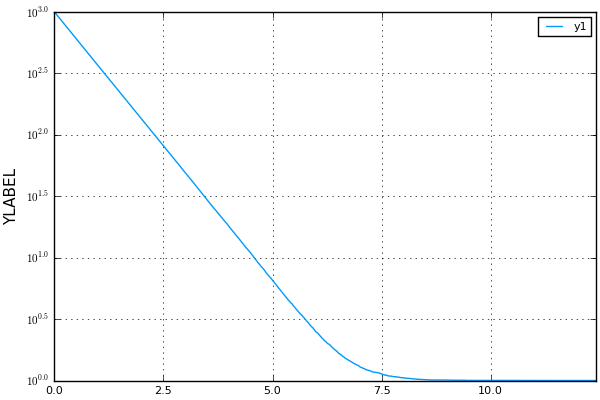

In [54]:
# Gráfica con el promedio de 500 iteraciones, escala semi-log
# Recta/Estocástica
plot(pt1, pn1)
yaxis!("YLABEL",:log10)


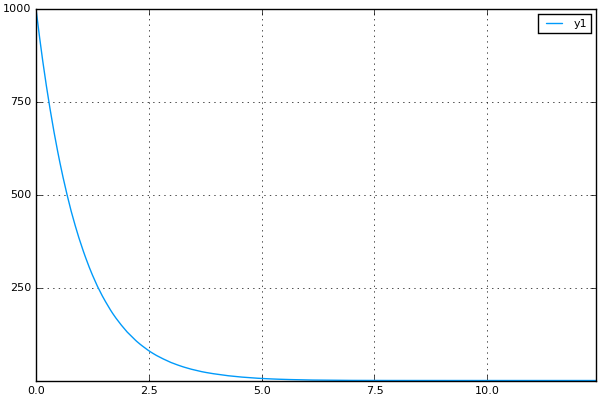

In [55]:
# Gráfica con el promedio de 500 iteraciones. Exponencial.
plot(pt1, pn1)

### Gráfica de Decaimiento para Diferentes Núcleos

In [73]:
lista1 = []
lista2 = []
for i in [100,1000,10000]
    tiempo, nucleos = Decay_MC(i, 0.01, 0.0001, 100)
    push!(lista1, tiempo)
    push!(lista2, nucleos)
end
 


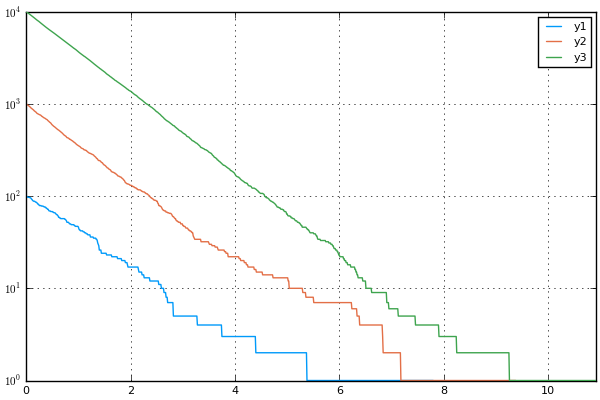

In [74]:
p = plot(lista1[1], lista2[1], yscale=:log10)
for i in 2:length(lista1)
    plot!(lista1[i],lista2[i])
end
p

In [40]:
?Semidesint

search:



La función Semidesint acepta 2 arreglos, uno de tiempos y otro de núcleos decaídos.  Devuelve el rango en el que se encuentra el periodo de semidesintegración.


In [92]:
"""
La función Semidesint acepta 2 arreglos, uno de tiempos y otro de núcleos decaídos. 
Devuelve el rango en el que se encuentra el periodo de semidesintegración.
"""
function Semidesint(Tiempo_D, Nucleo_D)
    
    vida_media = Nucleo_D[1]/2
    ind_mudo = 0
    
    for j in 1:length(Nucleo_D)
        if Nucleo_D[j] > vida_media 
           ind_mudo = j
        else
            ind_mudo = ind_mudo
        end
        #@show j, Nucleo_D[j], ind_mudo
    end
return Tiempo_D[ind_mudo], Nucleo_D[ind_mudo]
end

Semidesint

In [93]:
Semidesint(pt1, pn1)

(0.6800000000000004,504.5)


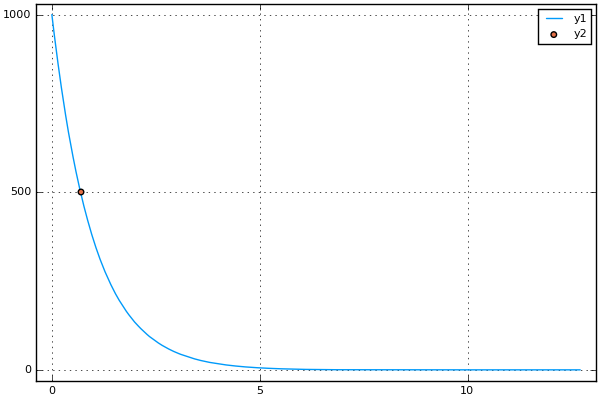

In [104]:
# Ejemplo
pt2, pn2 = prom_Decay(1000, 0.01, 0.0001, 100, 500);

# Gráfica con el promedio de 500 iteraciones. Exponencial.
punto1, punto2 = Semidesint(pt2, pn2)

plot(pt2, pn2)
scatter!([punto1], [punto2])

### Referencias

1. Landau, R., et al. (2010). *A Survey of Computational Physics*. USA. Recuperado de: http://www.uio.no/studier/emner/matnat/fys/FYS3150/h10/undervisningsmateriale/Lecture%20Notes/Landau.pdf

